# Housing Prediction - Advanced Linear Regression Assignment

**Problem Statement**

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

### Step 1 - Importing Necessory Libraries

In [1]:
# Importing Libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

import warnings
warnings.filterwarnings('ignore')

### Step 2 - Reading the Data

In [2]:
# Read the dataset

housing_data = pd.read_csv("train.csv")

In [3]:
# Setting Option to see all the columns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
# Display the head of the dataset

housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# Display shape of the dataset

housing_data.shape

(1460, 81)

In [6]:
# Display the statistical details of numerical data

housing_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
# Display column wise info of the data

housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Step 3 - Data Preparation - Cleaning Rows and Columns and Treating Missing Values

In [8]:
# Check for percentage null values in a column

round(housing_data.isnull().sum()/housing_data.shape[0] * 100, 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

In [9]:
# As NaN in 'Alley' column represent No alley access, rather than missing value indication, updating its category from NaN to No alley access

housing_data["Alley"].fillna("No alley access", inplace= True)

In [10]:
# As NaN in 'MiscFeature' column represent None, rather than missing value indication, updating its category from NaN to None

housing_data["MiscFeature"].fillna("None", inplace= True)

In [11]:
# As NaN in 'PoolQC' column represent No Pool, rather than missing value indication, updating its category from NaN to No Pool

housing_data["PoolQC"].fillna("No Pool", inplace= True)

In [12]:
# As NaN in 'Fence' column represent No Fence, rather than missing value indication, updating its category from NaN to No Fence

housing_data["Fence"].fillna("No Fence", inplace= True)

In [13]:
# As NaN in 'FirePlaceQu' column represent No Fireplace, rather than missing value indication, updating its category from NaN to No Fireplace

housing_data["FireplaceQu"].fillna("No Fireplace", inplace= True)

In [14]:
# Dropping columns where percentage null values is greater that 40

for data_column in housing_data.columns:
    if housing_data[data_column].isna().sum()/housing_data.shape[0] * 100 > 40:
        housing_data.drop(data_column, axis= 1, inplace=True)

In [15]:
# Dropping columns with all unique values, as they might not contribute to the analysis

def removeColumnWithAllUniqueValues(column):
    if len(housing_data[column].unique()) == len(housing_data[column]):
        housing_data.drop(column, axis=1, inplace=True)
        
for column in housing_data.columns.values:
    removeColumnWithAllUniqueValues(column)

In [16]:
# Dropping columns with single values, as they might not contribute to the analysis

def removeColumnWithSingleValue(column):
    if len(housing_data[column].unique()) == 1:
        housing_data.drop(column, axis=1, inplace=True)
        
for column in housing_data.columns.values:
    removeColumnWithSingleValue(column)

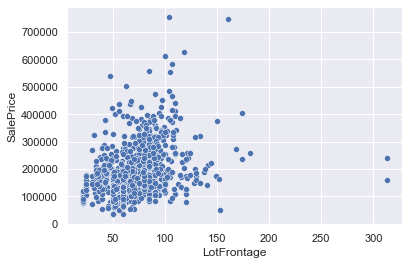

In [17]:
# LotFrontage has about 18% of missing data, so checking its effect of SalePrice before dropping the column

sns.scatterplot(data=housing_data, x= "LotFrontage", y = "SalePrice")
plt.show()

In [18]:
# From the scatterplot, its observed that 'LotFrontage' has relationship to the target variable 'SalePrice', so its not advised to drop those columns, better to remove those rows than dropping or imputing.

housing_data = housing_data[~housing_data.LotFrontage.isna()]

In [19]:
# There are 6 NA values is 'MasVnrType' and 'MasVnrArea', Imputing them with mode None and 0 respectively

housing_data.MasVnrType.fillna("None", inplace=True)
housing_data.MasVnrArea.fillna(0.0, inplace=True)

In [20]:
# As NaN in 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2' columns represent No Basement, rather than missing value indication, updating its category from NaN to NB (No Basement)

housing_data[['BsmtQual', 'GarageYrBlt', 'GarageFinish', 'BsmtFinType1', 'BsmtFinType2']] = housing_data[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']].fillna("NB")

In [21]:
# As NaN in 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond' columns represent No Garage, rather than missing value indication, updating its category from NaN to NG (No Garage), also dropping GarageYrBlt

housing_data[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']] = housing_data[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']].fillna("NG")
housing_data.drop("GarageYrBlt", axis=1, inplace= True)

In [22]:
# Imputing 1 Missing value in ELectrical with Mode SBrkr

housing_data.Electrical = housing_data.Electrical.fillna("SBrkr")

In [23]:
# Dropping columns having more than 90% of same data, as it may not contribute to the generic trend

for column in housing_data.columns.values:
    if (housing_data[column].value_counts()/ housing_data.shape[0] * 100 > 90).sum() == 1:
        housing_data.drop(column, axis=1, inplace=True)

In [24]:
# Creating new column 'YearLastModified' and replacing that instead of 'YearBuilt' and 'YearRemodelAdd'

housing_data["YearLastModified"] = np.maximum(housing_data.YearBuilt, housing_data.YearRemodAdd)
housing_data.drop(["YearBuilt","YearRemodAdd"], axis= 1, inplace= True)

In [25]:
# Since 'TotalBsmtSF' = 'BsmtFinSF1' + 'BsmtFinSF2' + 'BsmtUnfSF', we can drop the columns in the RHS and keep just the total column

housing_data.drop(["BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF"], axis= 1, inplace= True)

In [26]:
# Since 'GrLivArea' = '1stFlrSF' + '2ndFlrSF', we can drop the columns in the RHS and keep just the total column

housing_data.drop(["1stFlrSF", "2ndFlrSF"], axis= 1, inplace= True)

In [27]:
# There are some variables that should be in categorical

housing_data['MSSubClass'] = housing_data["MSSubClass"].astype("object")
housing_data['OverallQual']=housing_data['OverallQual'].astype('object')
housing_data['OverallCond']=housing_data['OverallCond'].astype('object')
housing_data['MoSold']=housing_data['MoSold'].astype('object')
housing_data['YrSold']=housing_data['YrSold'].astype('object')
housing_data['YearLastModified']=housing_data['YearLastModified'].astype('object')

In [28]:
# Display shape of the dataset

housing_data.shape

(1201, 51)

### Fixing Outliers

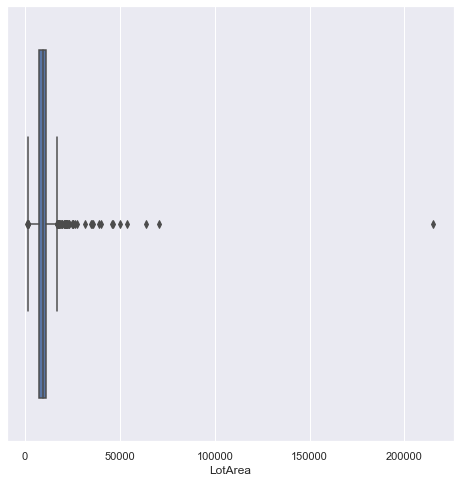

In [29]:
# Plotting Box plot of 'LotArea'

plt.figure(figsize=(8, 8))
bx = sns.boxplot(x = "LotArea", data = housing_data)
plt.show()

In [30]:
# Removing 'LotArea' outliers based on .97 quantile

housing_data = housing_data[housing_data.LotArea <= housing_data.LotArea.quantile(0.97)]

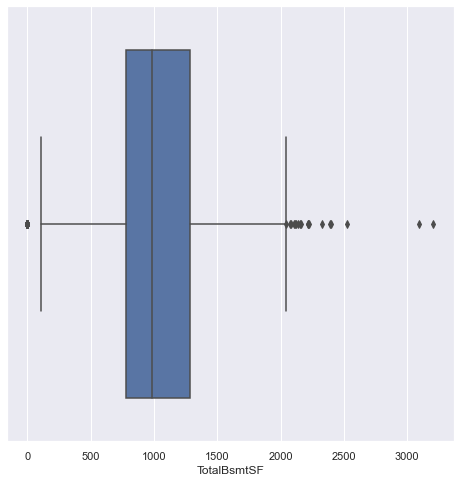

In [31]:
# Plotting Box plot of 'TotalBsmtSF'

plt.figure(figsize=(8, 8))
sns.boxplot(x = "TotalBsmtSF", data = housing_data)
plt.show()

In [32]:
# Removing 'TotalBsmtSF' outliers based on .97 quantile

housing_data = housing_data[housing_data.TotalBsmtSF <= housing_data.TotalBsmtSF.quantile(0.97)]

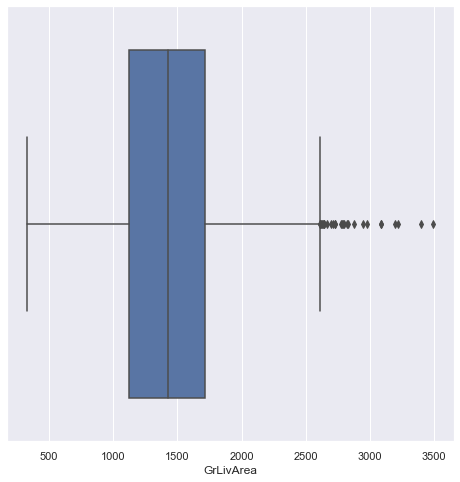

In [33]:
# Plotting Box plot of 'GrLivArea'

plt.figure(figsize=(8, 8))
sns.boxplot(x = "GrLivArea", data = housing_data)
plt.show()

In [34]:
# Removing 'GrLivArea' outliers based on .97 quantile

housing_data = housing_data[housing_data.GrLivArea <= housing_data.GrLivArea.quantile(0.97)]

### Step 4 - EDA

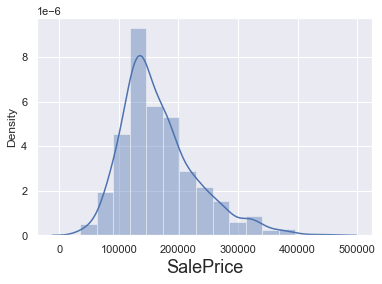

In [35]:
# Plotting histogram of the SalePrice

fig = plt.figure()
sns.distplot(housing_data.SalePrice, bins = 15) 
plt.xlabel('SalePrice', fontsize = 18)  
plt.show()

- It can be observed that majority of the SalePrice lie between 100000 - 200000

#### Visualising Numeric Variables

In [36]:
# Extracting columns with numerical dataTypes

housing_numeric = housing_data.select_dtypes(include=['float64', 'int64'])
housing_numeric.head()

,LotFrontage,LotArea,MasVnrArea,TotalBsmtSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,SalePrice
0,65.0,8450,196.0,856,1710,1,2,1,3,8,0,2,548,0,61,0,208500
1,80.0,9600,0.0,1262,1262,0,2,0,3,6,1,2,460,298,0,0,181500
2,68.0,11250,162.0,920,1786,1,2,1,3,6,1,2,608,0,42,0,223500
3,60.0,9550,0.0,756,1717,1,1,0,3,7,1,3,642,0,35,272,140000
4,84.0,14260,350.0,1145,2198,1,2,1,4,9,1,3,836,192,84,0,250000


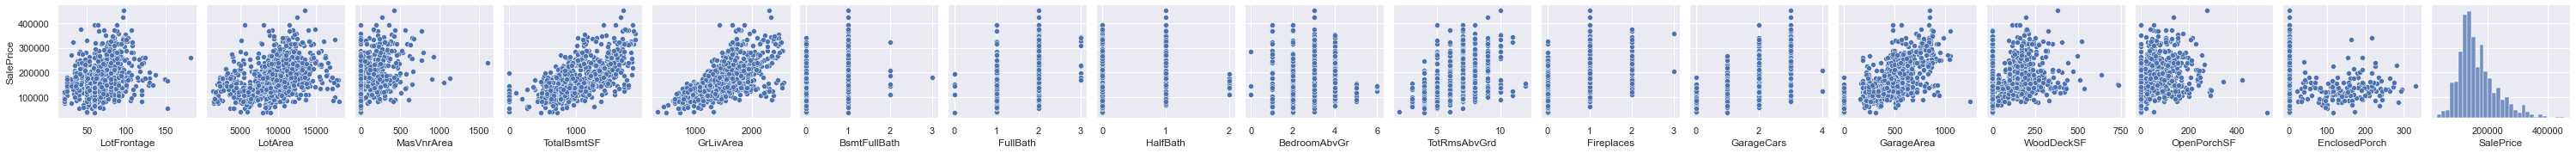

In [37]:
# Plotting a pairplot of numerical variables

sns.pairplot(data = housing_data, x_vars = housing_numeric.columns.values, y_vars="SalePrice")
plt.show()

The pairplot shows some useful insights:

- There are many feature variables which are shows linear trend with SalePrice

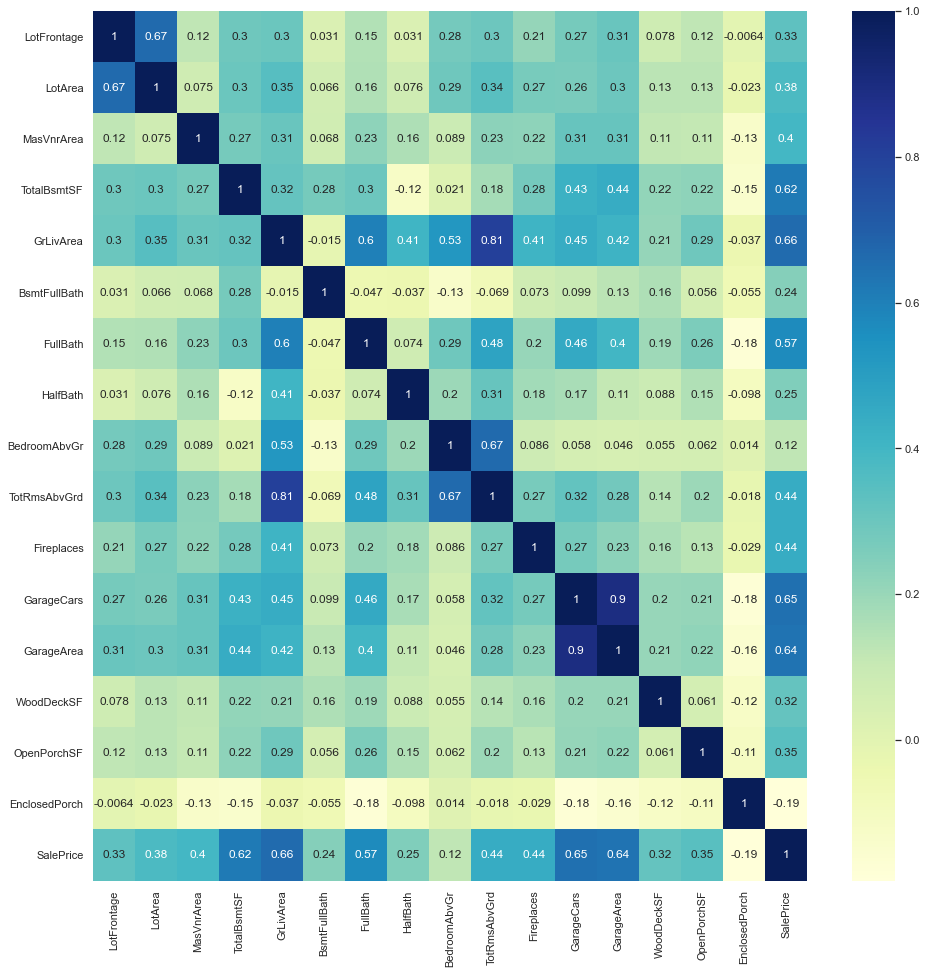

In [38]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,16))

# heatmap
sns.heatmap(housing_numeric.corr(), cmap="YlGnBu", annot=True)
plt.show()


The heatmap shows some useful insights:

Correlation of SalePrice with independent variables:
- 'GrLivArea', 'TotalBsmtSF', 'GarageCars' are positively correlated with SalePrice.

Correlation among independent variables:
- 'GarageCars' and 'GarageArea' are highly correlated each other, indicating multicollinearity among them.
- 'GrLivArea' and 'TotRmsAbvGrd' are highly correlated each other.

In [39]:
# Since 'GarageCars' and 'GarageArea' are highly correlated each other, dropping one

housing_data.drop("GarageArea", axis= 1, inplace= True)

In [40]:
# Since 'GrLivArea' and 'TotRmsAbvGrd' are highly correlated each other, dropping one

housing_data.drop("TotRmsAbvGrd", axis= 1, inplace= True)

#### Visualising Categorical Variables

In [41]:
# Extracting columns with categorical dataTypes

housing_categorical = housing_data.select_dtypes(include=['object'])
housing_categorical.head()

,MSSubClass,MSZoning,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,FireplaceQu,GarageType,GarageFinish,GarageQual,Fence,MoSold,YrSold,SaleType,SaleCondition,YearLastModified
0,60,RL,Reg,Inside,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,Ex,Gd,No Fireplace,Attchd,No,TA,No Fence,2,2008,WD,Normal,2003
1,20,RL,Reg,FR2,Veenker,Feedr,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,Ex,TA,TA,Attchd,Gd,TA,No Fence,5,2007,WD,Normal,1976
2,60,RL,IR1,Inside,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,Ex,Gd,TA,Attchd,Mn,TA,No Fence,9,2008,WD,Normal,2002
3,70,RL,IR1,Corner,Crawfor,Norm,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,Gd,Gd,Gd,Detchd,No,TA,No Fence,2,2006,WD,Abnorml,1970
4,60,RL,IR1,FR2,NoRidge,Norm,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,Ex,Gd,TA,Attchd,Av,TA,No Fence,12,2008,WD,Normal,2000


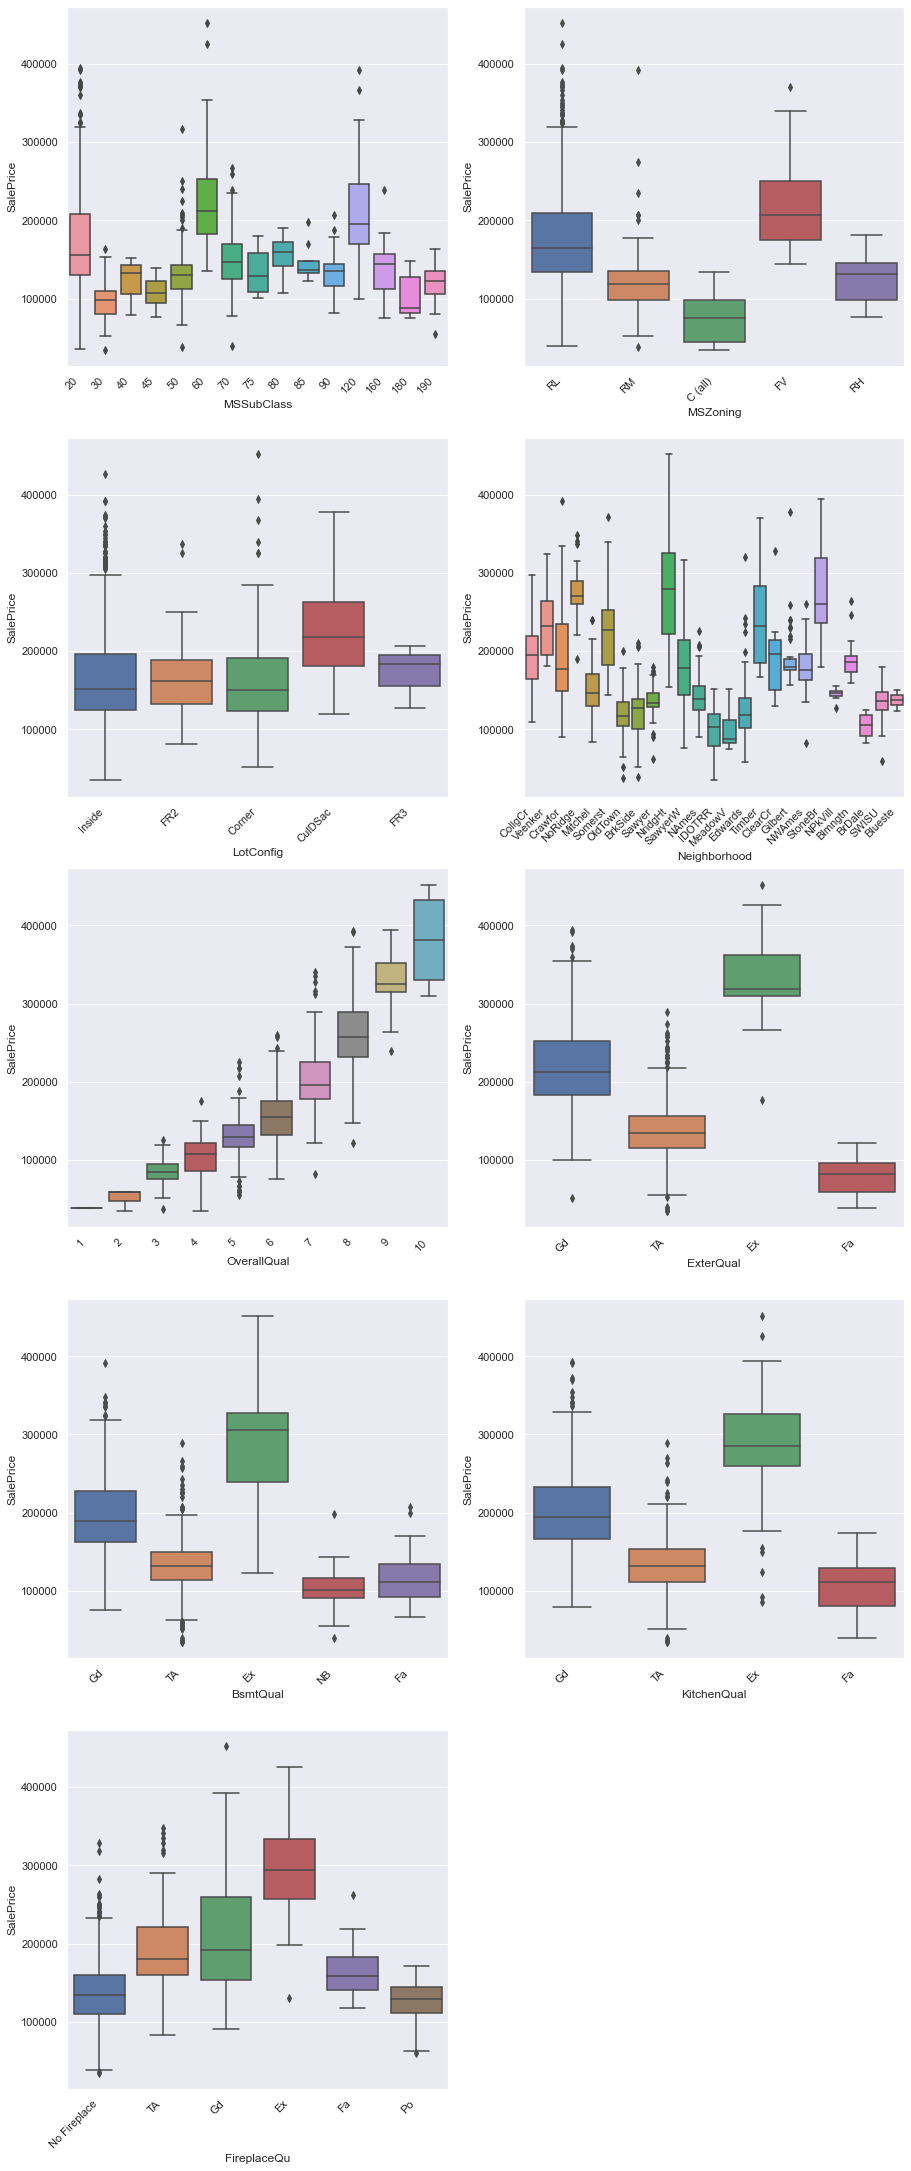

In [42]:
# Visualising box plots

plt.figure(figsize=(15, 70))

housing_categorical_columns = ["MSSubClass", "MSZoning", "LotConfig", "Neighborhood", "OverallQual", "ExterQual", "BsmtQual", "KitchenQual", "FireplaceQu"]

for index, column in enumerate(housing_categorical_columns):
    plt.subplot(len(housing_categorical_columns),2,index + 1)
    bx = sns.boxplot(x = column, y = 'SalePrice', data = housing_data)
    bx.set_xticklabels(bx.get_xticklabels(), rotation=45, ha='right')

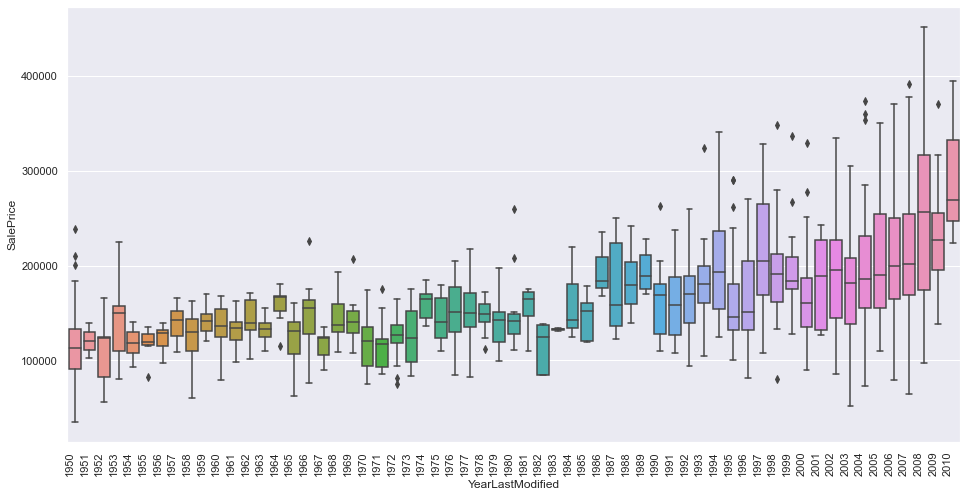

In [43]:
plt.figure(figsize=(16, 8))

bx = sns.boxplot(x = "YearLastModified", y = 'SalePrice', data = housing_data)
bx.set_xticklabels(bx.get_xticklabels(), rotation=90, ha='right')
    
plt.show()

### There are severals observation which are visible from visualising categorical varaibles

- It can be seen that **SalePrice** increases when the Build/Modified year is the latest, meaning the latest modified/built houses have more demand than old builds/modified.
- In Overall, when the quality of several features like Basement, Kitchen, Fireplace, Exterior etc is **Excellent**, the **SalePrice** is also on the higher side.
- Also the **OverallQuality** has a very high impact on the **SalePrice**, It can be observed that **Se=alePrice** increases steadily with increase in **OverallQuality**

### Step 5 - Data Preprocessing

In [44]:
# Import Preprocessing Libraries

from sklearn import preprocessing 
from sklearn.preprocessing import MinMaxScaler

In [45]:
housing_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,HeatingQC,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice,YearLastModified
0,60,RL,65.0,8450,Reg,Inside,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,856,Ex,1710,1,2,1,3,Gd,0,No Fireplace,Attchd,No,2,TA,0,61,0,No Fence,2,2008,WD,Normal,208500,2003
1,20,RL,80.0,9600,Reg,FR2,Veenker,Feedr,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,1262,Ex,1262,0,2,0,3,TA,1,TA,Attchd,Gd,2,TA,298,0,0,No Fence,5,2007,WD,Normal,181500,1976
2,60,RL,68.0,11250,IR1,Inside,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,920,Ex,1786,1,2,1,3,Gd,1,TA,Attchd,Mn,2,TA,0,42,0,No Fence,9,2008,WD,Normal,223500,2002
3,70,RL,60.0,9550,IR1,Corner,Crawfor,Norm,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,756,Gd,1717,1,1,0,3,Gd,1,Gd,Detchd,No,3,TA,0,35,272,No Fence,2,2006,WD,Abnorml,140000,1970
4,60,RL,84.0,14260,IR1,FR2,NoRidge,Norm,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,1145,Ex,2198,1,2,1,4,Gd,1,TA,Attchd,Av,3,TA,192,84,0,No Fence,12,2008,WD,Normal,250000,2000


In [46]:
# Extracting columns with categorical dataTypes

housing_categorical = housing_data.select_dtypes(include=['object'])

In [47]:
# Extracting columns with numerical dataTypes

housing_numeric = housing_data.select_dtypes(include=['float64', 'int64'])

In [48]:
# creating dummy variables for categorical variables

housing_categorical.head()

,MSSubClass,MSZoning,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,FireplaceQu,GarageType,GarageFinish,GarageQual,Fence,MoSold,YrSold,SaleType,SaleCondition,YearLastModified
0,60,RL,Reg,Inside,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,Ex,Gd,No Fireplace,Attchd,No,TA,No Fence,2,2008,WD,Normal,2003
1,20,RL,Reg,FR2,Veenker,Feedr,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,Ex,TA,TA,Attchd,Gd,TA,No Fence,5,2007,WD,Normal,1976
2,60,RL,IR1,Inside,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,Ex,Gd,TA,Attchd,Mn,TA,No Fence,9,2008,WD,Normal,2002
3,70,RL,IR1,Corner,Crawfor,Norm,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,Gd,Gd,Gd,Detchd,No,TA,No Fence,2,2006,WD,Abnorml,1970
4,60,RL,IR1,FR2,NoRidge,Norm,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,Ex,Gd,TA,Attchd,Av,TA,No Fence,12,2008,WD,Normal,2000


In [49]:
# Creating dummies - one hot encoding

housing_dummies = pd.get_dummies(housing_categorical, drop_first=True)
housing_dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NB,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NB,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NB,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NG,GarageFinish_Gd,GarageFinish_Mn,GarageFinish_NB,GarageFinish_No,GarageQual_Fa,GarageQual_Gd,GarageQual_NG,GarageQual_Po,GarageQual_TA,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,YearLastModified_1951,YearLastModified_1952,YearLastModified_1953,YearLastModified_1954,YearLastModified_1955,YearLastModified_1956,YearLastModified_1957,YearLastModified_1958,YearLastModified_1959,YearLastModified_1960,YearLastModified_1961,YearLastModified_1962,YearLastModified_1963,YearLastModified_1964,YearLastModified_1965,YearLastModified_1966,YearLastModified_1967,YearLastModified_1968,YearLastModified_1969,YearLastModified_1970,YearLastModified_1971,YearLastModified_1972,YearLastModified_1973,YearLastModified_1974,YearLastModified_1975,YearLastModified_1976,YearLa

In [50]:
# drop categorical variables from which dummies were created

housing_data.drop(list(housing_categorical.columns), axis=1, inplace=True)

In [51]:
# concat dummy variables with housing_data

housing_data = pd.concat([housing_data, housing_dummies], axis=1)

In [52]:
# Displaying Final shape

housing_data.shape

(1096, 288)

### Step 6 - Splitting Data into Training and Test Sets

In [53]:
# import libraries required for splitting data

from sklearn.model_selection import train_test_split

In [54]:
# Splitting housing_data into train and test set

df_train, df_test = train_test_split(housing_data, train_size = 0.70, test_size = 0.30, random_state = 100)

In [55]:
# Printing the shape of train and test dataframes

print(df_train.shape)
print(df_test.shape)

(767, 288)
(329, 288)


### Rescaling the Features 

In [56]:
# Scaling using MinMax Scaler

scaler = MinMaxScaler()

df_train[housing_numeric.columns.values] = scaler.fit_transform(df_train[housing_numeric.columns.values])

In [57]:
# Confirming if everything is scaled btw 0-1

df_train.describe()

,LotFrontage,LotArea,MasVnrArea,TotalBsmtSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,SalePrice,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NB,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NB,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NB,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NG,GarageFinish_Gd,GarageFinish_Mn,GarageFinish_NB,GarageFinish_No,GarageQual_Fa,GarageQual_Gd,GarageQual_NG,GarageQual_Po,GarageQual_TA,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,YearLastModified_1951,YearLastModified_1952,YearLastModified_1953,YearLastModified_1954,YearLastModified_1955,YearLastModified_1956,YearLastModified_1957,YearLastModified_1958,YearLastModified_1959,YearLastModified_1960,YearLastModified_1961,YearLastModified_1962,YearLastModified_1963,YearLastModified_1964,YearLastModified_1965,YearLastModified_1966,YearLastModified_1967,YearLastModified_1968,YearLastModified

### Dividing into X and Y sets for the model building

In [58]:
y_train = df_train.pop("SalePrice")
X_train = df_train

In [59]:
print(y_train.shape)
print(X_train.shape)

(767,)
(767, 287)


### Step 7 - Model Building and Evaluation

In [60]:
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [61]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [62]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-34711103759.49138
[ 5.07709527e-02  2.67586541e-02  1.72479151e-03  1.35800920e-01
  1.94815722e-01  6.30695755e-02  5.62443510e-02  3.61551849e-02
 -5.17315595e-03 -7.02080621e-03  7.69901456e-02  3.55362939e-02
  1.86746580e-02  7.69262523e-03 -1.93867275e-02  9.36090420e-03
 -9.85739757e-03 -3.30945158e-02  2.28956658e-02 -8.67223303e-03
 -3.76525643e-02 -9.77998981e-03 -5.74855132e-03  3.14542094e+10
  4.52060713e+10  4.52060713e+10  4.52060713e+10  6.16677060e+10
  1.51579229e-01  1.24441254e-01  1.19813874e-01  9.52703694e-02
  2.63601187e-02  5.25711966e-02  2.91451903e-03  3.05282942e-02
 -1.47968406e-02 -2.11577517e-02  3.43698881e-03  2.29111121e-02
  5.41021749e-02  2.82747930e-02  6.39143411e-03  1.38732189e-02
  6.78451252e-02 -1.73439350e-02 -4.03392515e-03  1.92122168e-02
 -2.92215218e-03 -6.90275903e-03 -7.72066282e-03  1.57649372e-02
 -6.54988577e-03  9.99383857e-02  5.36017370e-02 -8.31119535e-03
 -1.68238594e-02  6.94616181e-03  1.64655278e-02  1.38577446e-02
  6.02

In [63]:
# Predicting train set and getting R2 Score, RSS and MSE of Train Set 

y_pred_train = lm.predict(X_train)

metric_linear = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(f"R2 Score of Train Set : {r2_train_lr}")
metric_linear.append(r2_train_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(f"RSS of Train Set : {rss1_lr}")
metric_linear.append(rss1_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(f"MSE of Train Set : {mse_train_lr}")
metric_linear.append(mse_train_lr**0.5)

R2 Score of Train Set : 0.9535215061469432
RSS of Train Set : 0.9105029814045877
MSE of Train Set : 0.0011870964555470505


## Residual Analysis of the train data

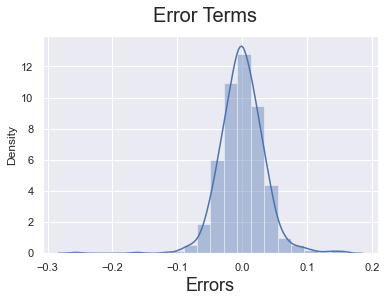

In [64]:
# Plotting histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_pred_train), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)    
plt.show()

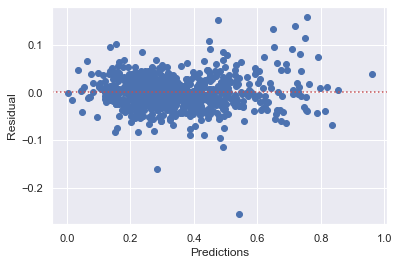

In [65]:

plt.scatter( y_pred_train , (y_train - y_pred_train))
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

In [66]:
# Scaling Test set to evaluate of the test set as well

df_test[housing_numeric.columns.values] = scaler.transform(df_test[housing_numeric.columns.values])

y_test = df_test.pop("SalePrice")
X_test = df_test

In [67]:
# Predicting Test Set and getting R2 Score, RSS and MSE of Test Set 

y_pred_test = lm.predict(X_test)

r2_test_lr = r2_score(y_test, y_pred_test)
print(f"R2 Score of Test Set : {r2_test_lr}")
metric_linear.append(r2_test_lr)

rss_test_lr = np.sum(np.square(y_test - y_pred_test))
print(f"RSS of Test Set : {rss_test_lr}")
metric_linear.append(rss_test_lr)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(f"MSE of Test Set : {mse_test_lr}")
metric_linear.append(mse_test_lr**0.5)

R2 Score of Test Set : -5.5775722441142016e+20
RSS of Test Set : 5.063677984133497e+21
MSE of Test Set : 1.5391118492806982e+19


## Ridge and Lasso Regression

In [98]:
# Getting the optimal value of lamba using GridSearchCV

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [99]:
# Printing the best hyperparameter alpha

print(model_cv.best_params_)

{'alpha': 3.0}


In [70]:
# Fitting Ridge model for alpha = 3 and printing coefficients which have been penalised

alpha = 3
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 3.28306041e-02  3.26492632e-02  1.74721949e-02  1.15628790e-01
  1.39470452e-01  5.08404124e-02  4.62340859e-02  3.01351507e-02
  8.14490985e-03  1.08030831e-02  5.88176797e-02  3.50968516e-02
  1.83938224e-02 -3.00212314e-03 -2.18293497e-02  2.59047985e-03
  2.14241042e-03  3.46154333e-04  3.08214354e-02  6.61390666e-03
 -3.73230292e-03 -5.51736128e-03 -7.16076193e-03 -1.16821347e-02
 -1.39980107e-02 -1.29053359e-02 -2.52947049e-03 -1.87877010e-02
  4.06029766e-02  1.54456349e-02  2.53725193e-02  1.02133688e-02
  1.19806337e-02  2.19070609e-02 -1.05716103e-03  2.96097087e-02
 -1.02576084e-02 -6.93542328e-03  2.75938319e-03  5.03919441e-03
  1.26476220e-02  5.22317839e-03 -1.67029895e-03 -3.49299034e-03
  4.49446568e-02 -2.70162235e-02 -2.22831696e-02 -2.15222387e-02
 -2.88701414e-02 -1.74979030e-02 -1.78616395e-02  1.23923006e-02
 -1.27367733e-02  5.71674392e-02  4.72320195e-02 -2.49067813e-02
 -2.22973580e-02 -1.00713907e-02 -3.31877293e-03  1.31938770e-02
  2.54481026e-02 -8.31520

In [71]:
# Predicting train set and getting R2 Score, RSS and MSE of Train Set 

y_pred_train = ridge.predict(X_train)

metric_ridge = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(f"R2 Score of Train Set : {r2_train_lr}")
metric_ridge.append(r2_train_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(f"RSS of Train Set : {rss1_lr}")
metric_ridge.append(rss1_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(f"MSE of Train Set : {mse_train_lr}")
metric_ridge.append(mse_train_lr**0.5)

R2 Score of Train Set : 0.9460665997355742
RSS of Train Set : 1.0565428796659913
MSE of Train Set : 0.0013775004950012924


In [72]:
# Predicting Test Set and getting R2 Score, RSS and MSE of Test Set 

y_pred_test = ridge.predict(X_test)

r2_test_lr = r2_score(y_test, y_pred_test)
print(f"R2 Score of Test Set : {r2_test_lr}")
metric_ridge.append(r2_test_lr)

rss_test_lr = np.sum(np.square(y_test - y_pred_test))
print(f"RSS of Test Set : {rss_test_lr}")
metric_ridge.append(rss_test_lr)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(f"MSE of Test Set : {mse_test_lr}")
metric_ridge.append(mse_test_lr**0.5)

R2 Score of Test Set : 0.9020454555972433
RSS of Test Set : 0.8892942094322255
MSE of Test Set : 0.0027030219131678585


## LASSO

In [107]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [74]:
# Printing the best hyperparameter alpha

print(model_cv.best_params_)

{'alpha': 0.0001}


In [75]:
#Fitting Lasso model for alpha = 0.0001 and printing coefficients which have been penalised

alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [76]:
lasso.coef_

array([ 2.72241503e-02,  2.27100547e-02,  0.00000000e+00,  1.45293975e-01,
        1.88057914e-01,  5.79675839e-02,  3.50302600e-02,  2.54191227e-02,
       -0.00000000e+00,  0.00000000e+00,  5.69627849e-02,  3.36871589e-02,
        9.22959224e-03, -6.34971319e-04, -1.46740739e-02,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  3.57195572e-02,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -6.86555895e-03, -2.40655717e-02,
       -1.48982768e-02, -0.00000000e+00,  0.00000000e+00, -2.66668200e-02,
        4.30362934e-02,  3.35399374e-03,  1.49501509e-02,  0.00000000e+00,
        8.97248766e-03,  1.59807242e-02, -2.55592817e-04,  3.06515810e-02,
       -2.39255657e-03, -0.00000000e+00,  1.81947136e-03,  0.00000000e+00,
        0.00000000e+00,  5.98172966e-03, -0.00000000e+00,  3.40010036e-04,
        5.04930042e-02, -2.47245339e-02, -1.02226869e-02, -2.26013327e-02,
       -3.78737254e-02, -1.38610991e-02, -1.60867482e-02,  0.00000000e+00,
       -6.60934607e-03,  

In [77]:
# Predicting train set and getting R2 Score, RSS and MSE of Train Set 

y_pred_train = lasso.predict(X_train)

metric_lasso = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(f"R2 Score of Train Set : {r2_train_lr}")
metric_lasso.append(r2_train_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(f"RSS of Train Set : {rss1_lr}")
metric_lasso.append(rss1_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(f"MSE of Train Set : {mse_train_lr}")
metric_lasso.append(mse_train_lr**0.5)

R2 Score of Train Set : 0.9443133060474016
RSS of Train Set : 1.0908894988874724
MSE of Train Set : 0.0014222809633474217


In [78]:
# Predicting Test Set and getting R2 Score, RSS and MSE of Test Set 

y_pred_test = lasso.predict(X_test)

r2_test_lr = r2_score(y_test, y_pred_test)
print(f"R2 Score of Test Set : {r2_test_lr}")
metric_lasso.append(r2_test_lr)

rss_test_lr = np.sum(np.square(y_test - y_pred_test))
print(f"RSS of Test Set : {rss_test_lr}")
metric_lasso.append(rss_test_lr)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(f"MSE of Test Set : {mse_test_lr}")
metric_lasso.append(mse_test_lr**0.5)

R2 Score of Test Set : 0.9059444037606673
RSS of Test Set : 0.8538970561327015
MSE of Test Set : 0.002595431781558363


### Step 8 - Results Comparison

In [79]:
print(f"Lasso has selected {(lasso.coef_ > 0).sum()} feature variables and eliminated rest")

Lasso has selected 88 feature variables and eliminated rest


In [84]:
lasso_coeff = pd.Series(lasso.coef_, index= X_train.columns)
lasso_coeff.sort_values(ascending= False).head(10)

GrLivArea               0.188058
TotalBsmtSF             0.145294
OverallQual_9           0.098189
Neighborhood_NoRidge    0.072559
OverallQual_8           0.066038
BsmtFullBath            0.057968
GarageCars              0.056963
OverallQual_10          0.053190
OverallCond_9           0.051827
Neighborhood_Crawfor    0.050493
dtype: float64

In [85]:
ridge_coeff = pd.Series(ridge.coef_, index= X_train.columns)
ridge_coeff.sort_values(ascending= False).head(10)

GrLivArea               0.139470
TotalBsmtSF             0.115629
OverallQual_9           0.069160
GarageCars              0.058818
Neighborhood_NoRidge    0.057167
BsmtFullBath            0.050840
Neighborhood_NridgHt    0.047232
FullBath                0.046234
OverallQual_8           0.045605
Neighborhood_Crawfor    0.044945
dtype: float64

In [82]:
# Creating a comparison Table to show the results of different models

evaluation_table = pd.DataFrame(columns=['Metrics', 'Linear Regression', "Ridge Regression", "Lasso Regression"])

metrics = ["R2 Score Train", "R2 Score Train", "RSS Train", "RSS Test", "MSE Train", "MSE Test"]
linear_metrics = [metric_linear[0], metric_linear[3], metric_linear[1], metric_linear[4], metric_linear[2], metric_linear[5]]
ridge_metrics = [metric_ridge[0], metric_ridge[3], metric_ridge[1], metric_ridge[4], metric_ridge[2], metric_ridge[5]]
lasso_metrics = [metric_lasso[0], metric_lasso[3], metric_lasso[1], metric_lasso[4], metric_lasso[2], metric_lasso[5]]

evaluation_table.Metrics = metrics
evaluation_table["Linear Regression"] = linear_metrics
evaluation_table["Ridge Regression"] = ridge_metrics
evaluation_table["Lasso Regression"] = lasso_metrics

evaluation_table.index = evaluation_table.Metrics
evaluation_table.drop("Metrics", axis= 1, inplace= True)
evaluation_table

,Linear Regression,Ridge Regression,Lasso Regression
Metrics,,,
R2 Score Train,9.535215e-01,0.946067,0.944313
R2 Score Train,-5.577572e+20,0.902045,0.905944
RSS Train,9.105030e-01,1.056543,1.090889
RSS Test,5.063678e+21,0.889294,0.853897
MSE Train,3.445427e-02,0.037115,0.037713
MSE Test,3.923152e+09,0.051991,0.050945


From the above comparison table, its clear that :-
 - Buidling model using Ridge or Lasso has greatly helped to create a better model
 - In this case Ridge and Lasso behaves almost similarly, both having a R2 score of about 0.90 on Test Set
 - Lasso has eliminated a lot of features and remaining is 88
 
Features which contributes more to the **SalePrice** are :-
 - **GrLivArea = 1stFlrSF + 2ndFlrSF**
 - **TotalBsmtSF = BsmtFinSF1 + BsmtFinSF2 + BsmtUnfSF**
 - **OverallQua** and **OverallCond** - Higher quality/condition houses are priced higher
 - **GarageCars/GarageArea**
 - **Neighberhood** - **NoRidge**, **NridtgHt** and **Crawfor**